<a href="https://colab.research.google.com/github/ffatmanurggultekin/scoliosis-detection/blob/main/Dosya_1_Skolyoz_SVC_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Klasör yollarını belirleyin
#train_dir = '/content/drive/My Drive/train_clahe_sobel_diff_image'
#validation_dir = '/content/drive/My Drive/test_clahe_sobel_diff_image'

In [ ]:
from google.colab import drive

# Google Drive'ı bağlayın
drive.mount('/content/drive', force_remount=True) # Force remount to refresh credentials

Mounted at /content/drive


In [ ]:
import numpy as np
from PIL import Image
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import time

def image_to_column_vector(image_path):
    # Görüntüyü yükle ve gri tonlamalı hale getir
    img = Image.open(image_path).convert('L')

    # Görüntüyü numpy dizisine çevir
    img_array = np.array(img)

    # Sütun bazlı olarak vektörize et (F-Order kullanılarak)
    column_vector = img_array.flatten(order='F')

    return column_vector

def process_images_with_labels(base_folder):
    vectors = []
    labels = []
    for label in os.listdir(base_folder):
        label_folder = os.path.join(base_folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                    image_path = os.path.join(label_folder, filename)
                    vector = image_to_column_vector(image_path)
                    vectors.append(vector)
                    labels.append(label)
    return np.array(vectors), np.array(labels)

# Örnek kullanım
base_folder = '/content/drive/My Drive/SKOLYOZ/skolyoz_ham_veri/train'  # Burada ana klasör yolunu kullanın (ör. /path/to/dataset)
X_train, y_train = process_images_with_labels(base_folder)

base_folder_test = '/content/drive/My Drive/SKOLYOZ/skolyoz_ham_veri/test'  # Burada ana klasör yolunu kullanın (ör. /path/to/dataset)
X_test, y_test = process_images_with_labels(base_folder_test)

# NumPy dizilerini .npy formatında kaydet
np.save('/content/drive/My Drive/SKOLYOZ/X_train.npy', X_train)
np.save('/content/drive/My Drive/SKOLYOZ/X_test.npy', X_test)
np.save('/content/drive/My Drive/SKOLYOZ/y_train.npy', y_train)
np.save('/content/drive/My Drive/SKOLYOZ/y_test.npy', y_test)




KeyboardInterrupt: 

In [ ]:
import numpy as np
X_train = np.load('/content/drive/My Drive/SKOLYOZ/X_train.npy')
X_test = np.load('/content/drive/My Drive/SKOLYOZ/X_test.npy')
y_train = np.load('/content/drive/My Drive/SKOLYOZ/y_train.npy')
y_test = np.load('/content/drive/My Drive/SKOLYOZ/y_test.npy')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

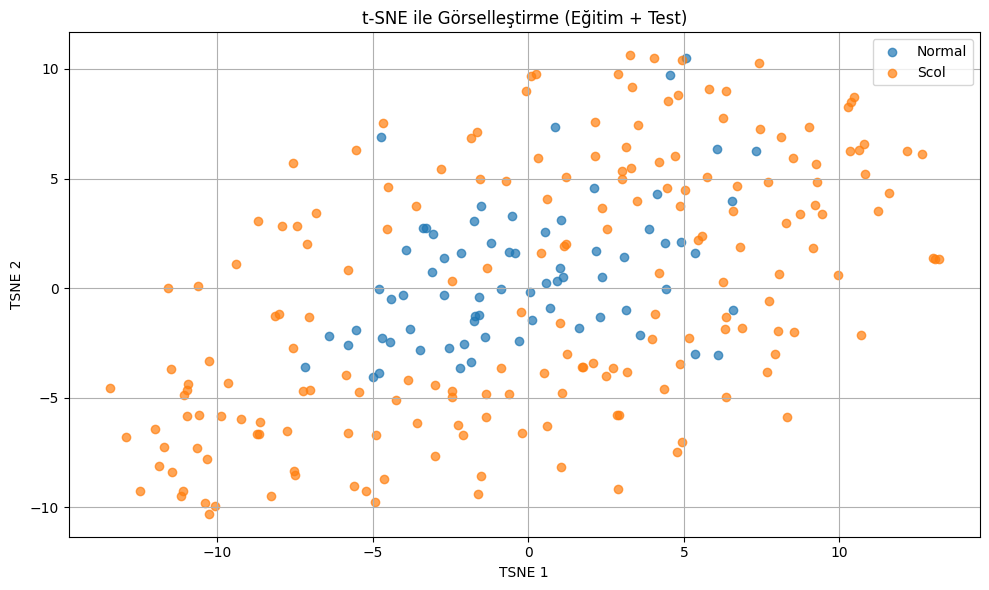

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# X_train ve X_test'i birleştir, aynı şekilde etiketleri de
X_combined = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.concatenate((y_train, y_test))

# t-SNE uygula
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_combined)

# Eğitim ve test örneklerini ayırmak için indeksleri belirle
n_train = len(X_train)

# Görselleştirme
plt.figure(figsize=(10, 6))
for label in np.unique(y_combined):
    indices = np.where(y_combined == label)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=label, alpha=0.7)

plt.title('t-SNE ile Görselleştirme (Eğitim + Test)')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
pip install umap-learn


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


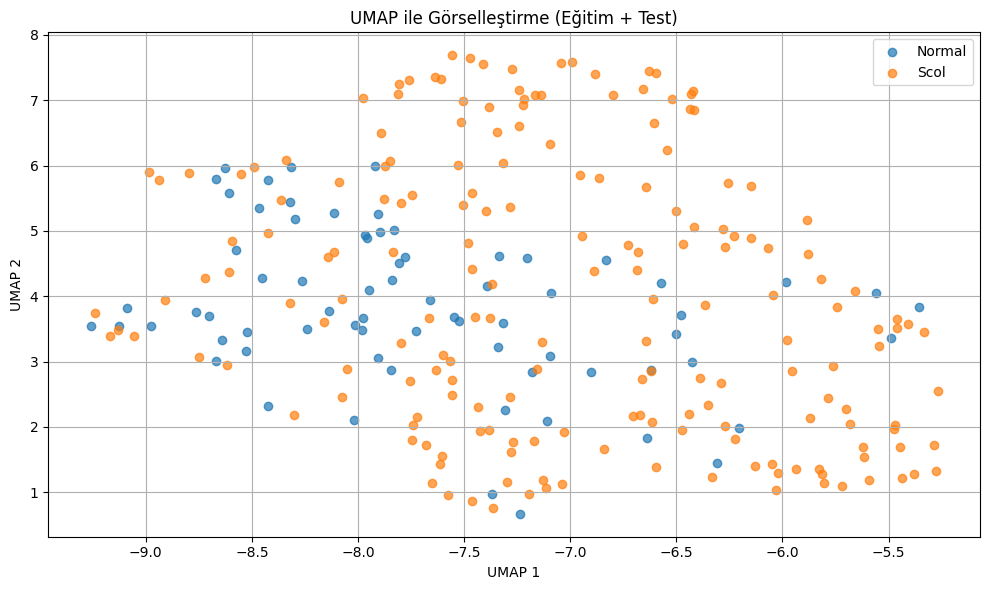

In [ ]:
import umap
import matplotlib.pyplot as plt
import numpy as np



# UMAP uygula
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_model.fit_transform(X_combined)

# Görselleştirme
plt.figure(figsize=(10, 6))
for label in np.unique(y_combined):
    indices = np.where(y_combined == label)
    plt.scatter(X_umap[indices, 0], X_umap[indices, 1], label=label, alpha=0.7)

plt.title('UMAP ile Görselleştirme (Eğitim + Test)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


LINEAR KERNEL


Train seti için CV Doğruluk: 0.9503 ± 0.0262

Test seti performans metrikleri:
Accuracy : 0.9241
Precision: 0.9636
Recall   : 0.9298
F1 Score : 0.9464

Modelin eğitimi 5.3027 saniye sürdü.

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

      Normal       0.83      0.91      0.87        22
        Scol       0.96      0.93      0.95        57

    accuracy                           0.92        79
   macro avg       0.90      0.92      0.91        79
weighted avg       0.93      0.92      0.93        79



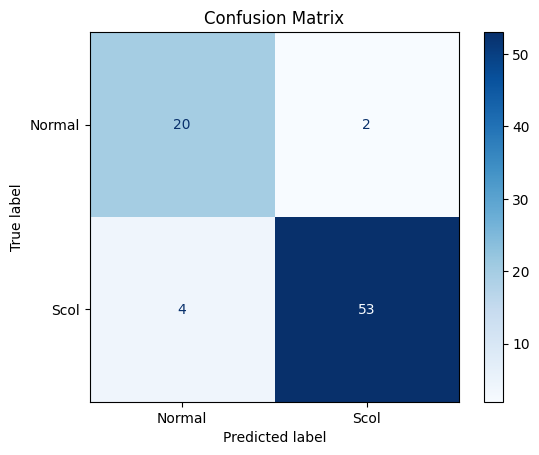


Destek Vektör Sayıları (Her sınıf için): [35 34]
Toplam Destek Vektör Sayısı: 69


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv  # Gerekli
from sklearn.model_selection import HalvingGridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Parametre grid'i
param_grid = {
    'C': [0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

# SVC modelini tanımla
svc = SVC(kernel='linear', random_state=42)

# HalvingGridSearchCV
halving_search = HalvingGridSearchCV(
    svc, param_grid, cv=5, scoring='accuracy', factor=2, n_jobs=-1
)

# Eğitim başlangıç zamanı
start_time = time.time()
halving_search.fit(X_resampled, y_resampled)
# Eğitim bitiş zamanı
end_time = time.time()

# En iyi modeli al
best_model = halving_search.best_estimator_

# Train doğruluk (cross-validation ortalama ve std)
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Train seti için CV Doğruluk: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Test tahminleri
y_pred = best_model.predict(X_test_scaled)

# Test metrikleri
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary', pos_label='Scol')
test_recall = recall_score(y_test, y_pred, average='binary', pos_label='Scol')
test_f1 = f1_score(y_test, y_pred, average='binary', pos_label='Scol')

print("\nTest seti performans metrikleri:")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1 Score : {test_f1:.4f}")

# Eğitim süresi
training_duration = end_time - start_time
print(f"\nModelin eğitimi {training_duration:.4f} saniye sürdü.")

# Sınıflandırma raporu
print("\nSınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()
# Destek vektör sayıları
print("\nDestek Vektör Sayıları (Her sınıf için):", best_model.n_support_)
print("Toplam Destek Vektör Sayısı:", len(best_model.support_))


Train seti için CV Doğruluk: 0.9352 ± 0.0333

Test seti performans metrikleri:
Accuracy : 0.8987
Precision: 0.9298
Recall   : 0.9298
F1 Score : 0.9298

Modelin eğitimi 54.2246 saniye sürdü.

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

      Normal       0.82      0.82      0.82        22
        Scol       0.93      0.93      0.93        57

    accuracy                           0.90        79
   macro avg       0.87      0.87      0.87        79
weighted avg       0.90      0.90      0.90        79



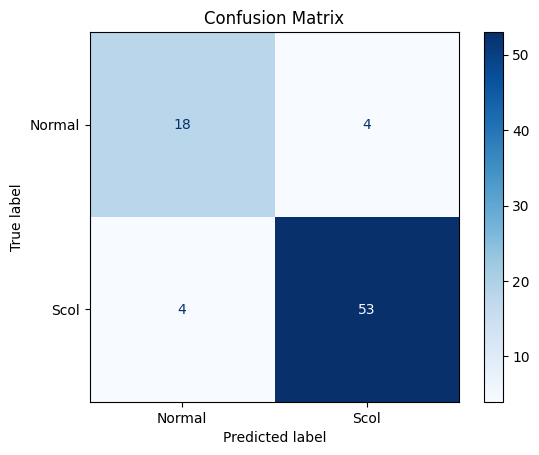


Destek Vektör Sayıları (Her sınıf için): [44 62]
Toplam Destek Vektör Sayısı: 106


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv  # Gerekli
from sklearn.model_selection import HalvingGridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Parametre grid'i
param_grid = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto',0.1, 1],
    'coef0': [0.0, 1.0],
    'class_weight': [None, 'balanced']
}

# SVC modelini tanımla
svc = SVC(kernel='poly', random_state=42)

# HalvingGridSearchCV
halving_search = HalvingGridSearchCV(
    svc, param_grid, cv=5, scoring='accuracy', factor=2, n_jobs=-1
)

# Eğitim başlangıç zamanı
start_time = time.time()
halving_search.fit(X_resampled, y_resampled)
# Eğitim bitiş zamanı
end_time = time.time()

# En iyi modeli al
best_model = halving_search.best_estimator_

# Train doğruluk (cross-validation ortalama ve std)
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Train seti için CV Doğruluk: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Test tahminleri
y_pred = best_model.predict(X_test_scaled)

# Test metrikleri
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary', pos_label='Scol')
test_recall = recall_score(y_test, y_pred, average='binary', pos_label='Scol')
test_f1 = f1_score(y_test, y_pred, average='binary', pos_label='Scol')

print("\nTest seti performans metrikleri:")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1 Score : {test_f1:.4f}")

# Eğitim süresi
training_duration = end_time - start_time
print(f"\nModelin eğitimi {training_duration:.4f} saniye sürdü.")

# Sınıflandırma raporu
print("\nSınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Destek vektör sayıları
print("\nDestek Vektör Sayıları (Her sınıf için):", best_model.n_support_)
print("Toplam Destek Vektör Sayısı:", len(best_model.support_))


In [ ]:
print("En iyi modelin degree parametresi:", best_model.degree)

En iyi modelin degree parametresi: 3


Train seti için CV Doğruluk: 0.9542 ± 0.0287

Test seti performans metrikleri:
Accuracy : 0.9241
Precision: 0.9180
Recall   : 0.9825
F1 Score : 0.9492

Modelin eğitimi 9.2480 saniye sürdü.

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

      Normal       0.94      0.77      0.85        22
        Scol       0.92      0.98      0.95        57

    accuracy                           0.92        79
   macro avg       0.93      0.88      0.90        79
weighted avg       0.93      0.92      0.92        79



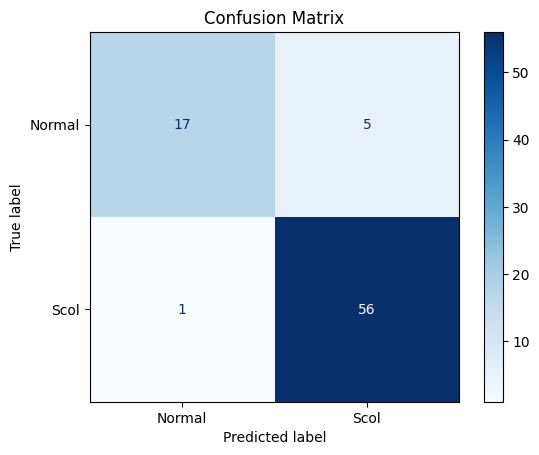


Destek Vektör Sayıları (Her sınıf için): [42 71]
Toplam Destek Vektör Sayısı: 113


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv  # Gerekli
from sklearn.model_selection import HalvingGridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 🔧 Parametre grid'i
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [ 0.1, 1, 10, 'scale', 'auto'],
    'class_weight': ['balanced']  # Dengesiz veri varsa önemli
}

# 🔍 HalvingGridSearchCV ile RBF SVC
svc_rbf = SVC(kernel='rbf', random_state=42)


# HalvingGridSearchCV
halving_search = HalvingGridSearchCV(
    svc_rbf, param_grid_rbf, cv=5, scoring='accuracy', factor=2, n_jobs=-1
)

# Eğitim başlangıç zamanı
start_time = time.time()
halving_search.fit(X_resampled, y_resampled)
# Eğitim bitiş zamanı
end_time = time.time()

# En iyi modeli al
best_model = halving_search.best_estimator_

# Train doğruluk (cross-validation ortalama ve std)
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Train seti için CV Doğruluk: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Test tahminleri
y_pred = best_model.predict(X_test_scaled)

# Test metrikleri
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary', pos_label='Scol')
test_recall = recall_score(y_test, y_pred, average='binary', pos_label='Scol')
test_f1 = f1_score(y_test, y_pred, average='binary', pos_label='Scol')

print("\nTest seti performans metrikleri:")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1 Score : {test_f1:.4f}")

# Eğitim süresi
training_duration = end_time - start_time
print(f"\nModelin eğitimi {training_duration:.4f} saniye sürdü.")

# Sınıflandırma raporu
print("\nSınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Destek vektör sayıları
print("\nDestek Vektör Sayıları (Her sınıf için):", best_model.n_support_)
print("Toplam Destek Vektör Sayısı:", len(best_model.support_))


In [ ]:
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

class LogKernelSVC(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, p=1.0, class_weight=None):
        self.C = C
        self.p = p
        self.class_weight = class_weight
        self.clf_ = None

    def _log_kernel(self, X, Y):
        D = pairwise_distances(X, Y, metric='euclidean')
        return np.log((D + np.exp(1)*self.p)/(D + self.p))

    def fit(self, X, y):
        K_train = self._log_kernel(X, X)
        self.X_train_ = X
        self.clf_ = SVC(kernel='precomputed', C=self.C, class_weight=self.class_weight)
        self.clf_.fit(K_train, y)
        return self

    def predict(self, X):
        K_test = self._log_kernel(X, self.X_train_)
        return self.clf_.predict(K_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

class LogKernelSVC(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, p=1.0, class_weight=None):
        self.C = C
        self.p = p
        self.class_weight = class_weight
        self.clf_ = None

    def _log_kernel(self, X, Y):
        D = pairwise_distances(X, Y, metric='euclidean')
        return np.log((D + np.exp(1)*self.p)/(D + self.p))

    def fit(self, X, y):
        K_train = self._log_kernel(X, X)
        self.X_train_ = X
        self.clf_ = SVC(kernel='precomputed', C=self.C, class_weight=self.class_weight)
        self.clf_.fit(K_train, y)
        # Add this line to set the classes_ attribute
        self.classes_ = self.clf_.classes_
        return self

    def predict(self, X):
        K_test = self._log_kernel(X, self.X_train_)
        return self.clf_.predict(K_test)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 10
max_resources_: 262
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 42
n_resources: 10
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 1
n_candidates: 21
n_resources: 20
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 2
n_candidates: 11
n_resources: 40
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 3
n_candidates: 6
n_resources: 80
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 3
n_resources: 160
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train seti için CV Doğruluk: 0.9467 ± 0.0369

Test seti performans metrikleri:
Accuracy : 0.9367
Precision: 0.9362
Recall   : 0.9367
F1 Score : 0.9362

Modelin eğitimi 2.2879 saniye sürdü.

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support



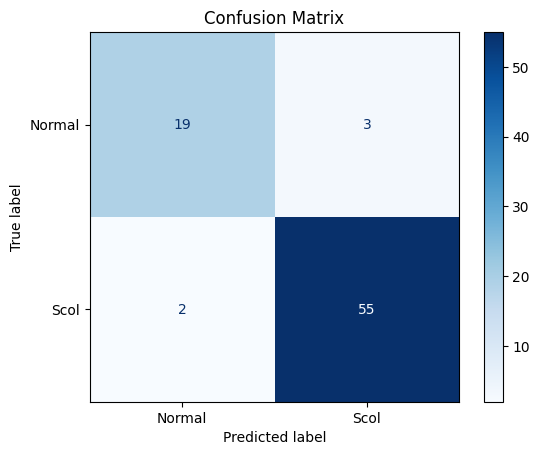


Destek Vektör Sayıları (Her sınıf için): [70 75]
Toplam Destek Vektör Sayısı: 145
En iyi hiperparametreler: {'C': 10, 'class_weight': 'balanced', 'p': 1000}


In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Parametre grid'i
param_grid = {
    'C': [0.01, 0.1, 1, 10,100,1000],
    'p': [0.001, 0.01,0.1, 1.0, 10, 100,1000],  # log kernel'e özel
    'class_weight': ['balanced']
}

# HalvingGridSearchCV ile optimizasyon
log_kernel_model = LogKernelSVC()
halving_search_log = HalvingGridSearchCV(
    log_kernel_model,
    param_grid=param_grid,
    cv=5,
    factor=2,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


# Başlangıç zamanı
start_time = time.time()
halving_search_log.fit(X_resampled, y_resampled)
# Bitiş zamanı
end_time = time.time()

# En iyi modeli al
best_model = halving_search_log.best_estimator_

# Train doğruluk (cross-validation ortalama ve std)
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Train seti için CV Doğruluk: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Test tahminleri
y_pred = best_model.predict(X_test_scaled)

# Test metrikleri
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary', pos_label='Scol')
test_recall = recall_score(y_test, y_pred, average='binary', pos_label='Scol')
test_f1 = f1_score(y_test, y_pred, average='binary', pos_label='Scol')

print("\nTest seti performans metrikleri:")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1 Score : {test_f1:.4f}")

# Eğitim süresi
training_duration = end_time - start_time
print(f"\nModelin eğitimi {training_duration:.4f} saniye sürdü.")

# Sınıflandırma raporu
print("\nSınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Destek vektör sayıları
print("\nDestek Vektör Sayıları (Her sınıf için):", best_model.clf_.n_support_)
print("Toplam Destek Vektör Sayısı:", len(best_model.clf_.support_))
print("En iyi hiperparametreler:", halving_search_log.best_params_) # Access best_params_ from halving_search_log


Train seti için CV Doğruluk: 0.9085 ± 0.0249

Test seti performans metrikleri:
Accuracy : 0.8101
Precision: 0.8750
Recall   : 0.8596
F1 Score : 0.8673

Modelin eğitimi 5.1181 saniye sürdü.

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

      Normal       0.65      0.68      0.67        22
        Scol       0.88      0.86      0.87        57

    accuracy                           0.81        79
   macro avg       0.76      0.77      0.77        79
weighted avg       0.81      0.81      0.81        79



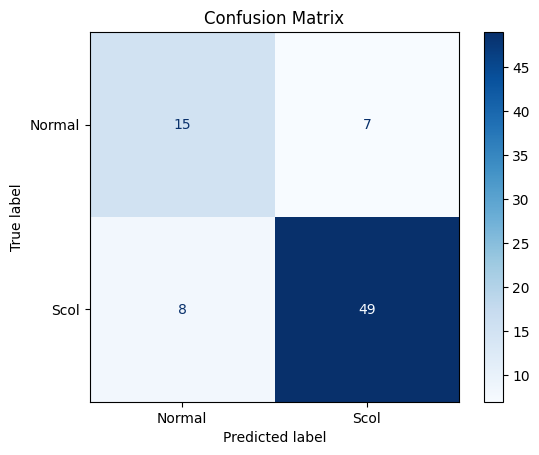


Destek Vektör Sayıları (Her sınıf için): [22 23]
Toplam Destek Vektör Sayısı: 45


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv  # Gerekli
from sklearn.model_selection import HalvingGridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 🔧 Parametre grid'i
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-3, 1e-2, 0.1, 1, 10, 'scale', 'auto'],
    'class_weight': ['balanced']  # Dengesiz veri varsa önemli
}

# 🔍 HalvingGridSearchCV ile RBF SVC
svc_rbf = SVC(kernel='sigmoid', random_state=42)
halving_rbf_search = HalvingGridSearchCV(
    svc_rbf,
    param_grid=param_grid_rbf,
    cv=5,
    factor=2,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1  # Daha fazla çıktı görmek istersen

)

# HalvingGridSearchCV
halving_search = HalvingGridSearchCV(
    svc_rbf, param_grid_rbf, cv=5, scoring='accuracy', factor=2, n_jobs=-1
)

# Eğitim başlangıç zamanı
start_time = time.time()
halving_search.fit(X_resampled, y_resampled)
# Eğitim bitiş zamanı
end_time = time.time()

# En iyi modeli al
best_model = halving_search.best_estimator_

# Train doğruluk (cross-validation ortalama ve std)
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Train seti için CV Doğruluk: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Test tahminleri
y_pred = best_model.predict(X_test_scaled)

# Test metrikleri
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary', pos_label='Scol')
test_recall = recall_score(y_test, y_pred, average='binary', pos_label='Scol')
test_f1 = f1_score(y_test, y_pred, average='binary', pos_label='Scol')

print("\nTest seti performans metrikleri:")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1 Score : {test_f1:.4f}")

# Eğitim süresi
training_duration = end_time - start_time
print(f"\nModelin eğitimi {training_duration:.4f} saniye sürdü.")

# Sınıflandırma raporu
print("\nSınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Destek vektör sayıları
print("\nDestek Vektör Sayıları (Her sınıf için):", best_model.n_support_)
print("Toplam Destek Vektör Sayısı:", len(best_model.support_))


In [ ]:
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

class LaplaceKernelSVC(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, p=1.0, class_weight=None):
        self.C = C
        self.p = p
        self.class_weight = class_weight
        self.clf_ = None

    def _log_kernel(self, X, Y):
        D = pairwise_distances(X, Y, metric='euclidean')
        return np.exp(-self.p*D)

    def fit(self, X, y):
        K_train = self._log_kernel(X, X)
        self.X_train_ = X
        self.clf_ = SVC(kernel='precomputed', C=self.C, class_weight=self.class_weight)
        self.clf_.fit(K_train, y)
        return self

    def predict(self, X):
        K_test = self._log_kernel(X, self.X_train_)
        return self.clf_.predict(K_test)


n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 16
max_resources_: 262
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 30
n_resources: 16
Fitting 5 folds for each of 30 candidates, totalling 150 fits
----------
iter: 1
n_candidates: 15
n_resources: 32
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 2
n_candidates: 8
n_resources: 64
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 4
n_resources: 128
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 256
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Train seti için CV Doğruluk: 0.9085 ± 0.0249

Test seti performans metrikleri:
Accuracy : 0.8101
Precision: 0.8750
Recall   : 0.8596
F1 Score : 0.8673

Modelin eğitimi 2.1568 saniye sürdü.

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

  

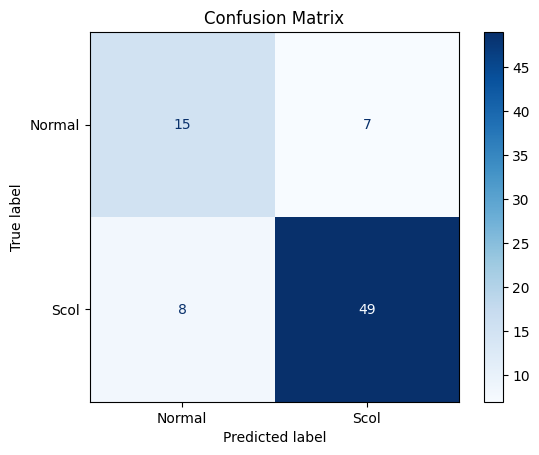


Destek Vektör Sayıları (Her sınıf için): [22 23]
Toplam Destek Vektör Sayısı: 45


In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Parametre grid'i
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'p': [0.01,0.1, 1.0, 10, 100],  # log kernel'e özel
    'class_weight': ['balanced']
}

# HalvingGridSearchCV ile optimizasyon
laplace_kernel_model = LaplaceKernelSVC()
halving_search_log = HalvingGridSearchCV(
    laplace_kernel_model,
    param_grid=param_grid,
    cv=5,
    factor=2,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


# Başlangıç zamanı
start_time = time.time()
halving_search_log.fit(X_resampled, y_resampled)
# Bitiş zamanı
end_time = time.time()

# En iyi modeli al
best_model = halving_search.best_estimator_

# Train doğruluk (cross-validation ortalama ve std)
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Train seti için CV Doğruluk: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Test tahminleri
y_pred = best_model.predict(X_test_scaled)

# Test metrikleri
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary', pos_label='Scol')
test_recall = recall_score(y_test, y_pred, average='binary', pos_label='Scol')
test_f1 = f1_score(y_test, y_pred, average='binary', pos_label='Scol')

print("\nTest seti performans metrikleri:")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1 Score : {test_f1:.4f}")

# Eğitim süresi
training_duration = end_time - start_time
print(f"\nModelin eğitimi {training_duration:.4f} saniye sürdü.")

# Sınıflandırma raporu
print("\nSınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Destek vektör sayıları
print("\nDestek Vektör Sayıları (Her sınıf için):", best_model.n_support_)
print("Toplam Destek Vektör Sayısı:", len(best_model.support_))


In [ ]:
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

class AnovaKernelSVC(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, gamma=0.1, d=2, class_weight=None):
        self.C = C
        self.gamma = gamma
        self.d = d
        self.class_weight = class_weight
        self.clf_ = None

    def _anova_kernel(self, X, Y):
        X = np.atleast_2d(X)
        Y = np.atleast_2d(Y)
        K = np.zeros((X.shape[0], Y.shape[0]))
        for i in range(X.shape[1]):
            diff = (X[:, i:i+1] - Y[:, i])  # broadcast edilerek farklar
            K += np.exp(-self.gamma * diff ** 2) ** self.d
        return K

    def fit(self, X, y):
        K_train = self._anova_kernel(X, X)
        self.X_train_ = X
        self.clf_ = SVC(kernel='precomputed', C=self.C, class_weight=self.class_weight)
        self.clf_.fit(K_train, y)
        return self

    def predict(self, X):
        K_test = self._anova_kernel(X, self.X_train_)
        return self.clf_.predict(K_test)


n_iterations: 5
n_required_iterations: 8
n_possible_iterations: 5
min_resources_: 10
max_resources_: 262
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 150
n_resources: 10
Fitting 5 folds for each of 150 candidates, totalling 750 fits
----------
iter: 1
n_candidates: 75
n_resources: 20
Fitting 5 folds for each of 75 candidates, totalling 375 fits
----------
iter: 2
n_candidates: 38
n_resources: 40
Fitting 5 folds for each of 38 candidates, totalling 190 fits
----------
iter: 3
n_candidates: 19
n_resources: 80
Fitting 5 folds for each of 19 candidates, totalling 95 fits
----------
iter: 4
n_candidates: 10
n_resources: 160
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Train seti için CV Doğruluk: 0.9085 ± 0.0249

Test seti performans metrikleri:
Accuracy : 0.8101
Precision: 0.8750
Recall   : 0.8596
F1 Score : 0.8673

Modelin eğitimi 601.0283 saniye sürdü.

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   

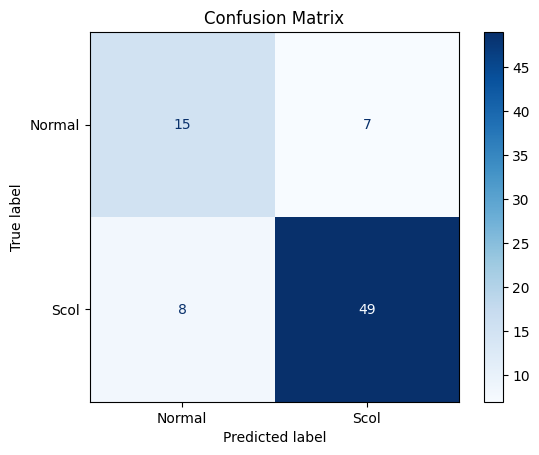


Destek Vektör Sayıları (Her sınıf için): [22 23]
Toplam Destek Vektör Sayısı: 45


In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Parametre grid'i
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'd': [0.01,0.1, 1.0, 10, 100],  # log kernel'e özel
    'gamma': [0.01,0.1, 1.0, 10, 100],  # log kernel'e özel
    'class_weight': ['balanced']
}

# HalvingGridSearchCV ile optimizasyon
anova_kernel_model = AnovaKernelSVC()
halving_search_log = HalvingGridSearchCV(
    anova_kernel_model,
    param_grid=param_grid,
    cv=5,
    factor=2,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


# Başlangıç zamanı
start_time = time.time()
halving_search_log.fit(X_resampled, y_resampled)
# Bitiş zamanı
end_time = time.time()

# En iyi modeli al
best_model = halving_search.best_estimator_

# Train doğruluk (cross-validation ortalama ve std)
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Train seti için CV Doğruluk: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Test tahminleri
y_pred = best_model.predict(X_test_scaled)

# Test metrikleri
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary', pos_label='Scol')
test_recall = recall_score(y_test, y_pred, average='binary', pos_label='Scol')
test_f1 = f1_score(y_test, y_pred, average='binary', pos_label='Scol')

print("\nTest seti performans metrikleri:")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1 Score : {test_f1:.4f}")

# Eğitim süresi
training_duration = end_time - start_time
print(f"\nModelin eğitimi {training_duration:.4f} saniye sürdü.")

# Sınıflandırma raporu
print("\nSınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Destek vektör sayıları
print("\nDestek Vektör Sayıları (Her sınıf için):", best_model.n_support_)
print("Toplam Destek Vektör Sayısı:", len(best_model.support_))
